In [1]:
library(ggplot2)
library(ggpubr)
library(cowplot)
library(tidyr)


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




In [2]:
column_names = c("chrom", "start", "end", "RBP", "span", "index")

In [3]:
color = c("#2278B5", "#F57F20", "#2FA148", "#D62A28")

In [4]:
df1 = read.csv("../analysis/index/rsv_vsv/G1_kethoxal-A549-Mock_M20_B01.txt", sep="\t")
colnames(df1) = column_names
df1$condition = "Mock"

df2 = read.csv("../analysis/index/rsv_vsv/G1_kethoxal-A549-RSV_M20_B01.txt", sep="\t")
colnames(df2) = column_names
df2$condition = "RSV"

df3 = read.csv("../analysis/index/rsv_vsv/G1_kethoxal-A549-VSV_M20_B01.txt", sep="\t")
colnames(df3) = column_names
df3$condition = "VSV"

df = rbind(df1, df2, df3)
df$condition = factor(df$condition, levels=c("Mock", "RSV", "VSV"))

In [5]:
head(df)

,chrom,start,end,RBP,span,index,condition
,<fct>,<int>,<int>,<fct>,<int>,<dbl>,<fct>
1,hg19_NM_000034,508,731,None,223,0.6720847,Mock
2,hg19_NM_000034,599,850,None,251,0.7149242,Mock
3,hg19_NM_000034,717,1679,None,962,0.9918521,Mock
4,hg19_NM_000034,864,1308,None,444,0.8913909,Mock
5,hg19_NM_000034,903,936,None,33,0.1521063,Mock
6,hg19_NM_000034,906,1074,None,168,0.5682895,Mock


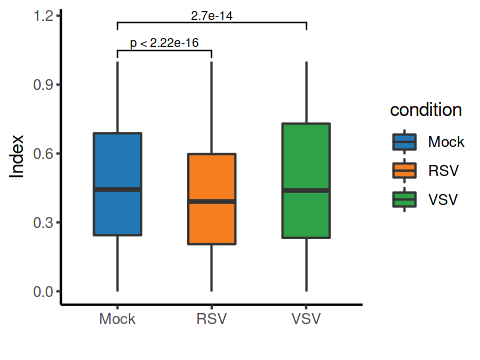

In [6]:
options(repr.plot.height=3, repr.plot.width=4)
p = ggplot(df, mapping=aes(x=condition, y=index)) + 
        geom_boxplot(mapping=aes(fill=condition), outlier.shape = NA, width=0.5) + #geom_jitter(width = 0.2, size=0.1) +
        stat_compare_means(comparisons=list(c(2,1), c(3,1)), size=2.5) +
        scale_x_discrete(labels=c("Mock", "RSV", "VSV")) +
        scale_fill_manual(values=color) +
        ylab("Index") + xlab("") +
        theme_classic() 
p

In [7]:
mean(df[df$condition=="Mock","index"])
mean(df[df$condition=="RSV","index"])
mean(df[df$condition=="VSV","index"])

[1] 0.4709163

[1] 0.4196262

[1] 0.4801159

In [8]:
median(df[df$condition=="Mock","index"])
median(df[df$condition=="RSV","index"])
median(df[df$condition=="VSV","index"])

[1] 0.4428941

[1] 0.3904291

[1] 0.4401016

In [9]:
length(df[df$condition=="Mock","index"])
length(df[df$condition=="RSV","index"])
length(df[df$condition=="VSV","index"])

[1] 1772734

[1] 596451

[1] 159725